# **Attacks on Machine Learning**
## **Übungsaufgaben**





## Aufgabe 1 - Phasen des Machine Learnings
>In der Vorlesung wurden Ihnen die vier Phasen des Machine Learnings vorgestellt.    
Nennen Sie diese vier Phasen und erläutern Sie diese in ein bis zwei Sätzen.

 * Daten sammeln: Es muss ein entsprechend händisch annotierter Datensatz (für Supervised Learning) aufgebaut werden. Dabei muss vor allem auf die Verteilung der Daten geachtet werden
 * Modellauswahl: Es muss eine Architektur für das Model gewählt werden. Außerdem müssen Hyperparameter und die Kostenfunktion initial gewählt werden
 * Training: Das ausgewählte Modell wird mit dem ausgewählten Datensatz trainiert und evaluiert, eventuell müssen in diesem Schritt auch noch einmal Hyperparameter oder sogar das gesamte Modell angepasst werden
 * Nutzung: Das Modell wird als Teil einer Anwendung eingesetzt.

## Aufgabe 2 - Attacken
Im folgenden sind Ihnen drei Beispiele von Attacken auf Machine Learning Modelle aufgelistet. Ordnen Sie den Beispielen jeweils eine vorgestellte Attacke aus der Vorlesung zu und begründen Sie Ihre Wahl kurz.

**Beispiel 1)**   
> Erkennung eines Stop-Schildes als Tempolimit-Schild.   
![Stop Sign](https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/6287639/8600701/8685687/garg8-2909068-large.gif)      
> 
>(Paper: T. Gu, K. Liu, B. Dolan-Gavitt and S. Garg, "BadNets: Evaluating Backdooring Attacks on Deep Neural Networks," in IEEE Access, vol. 7, pp. 47230-47244, 2019, doi: 10.1109/ACCESS.2019.2909068.)      


Es kann sich entweder um einen Angriff beim Ausführen handeln, also einen targeted oder untargeted adverserial attack (da die Ziele nicht bekannt sind kann nicht zwischen targeted und untargeted unterschieden werden). Oder auch bereits um ein Poisioning attack, bei dem die Trainingsdaten verändert werden.



**Beispiel 2)**   
>Für dieses Beispiel schauen Sie sich bitte das nachfolgende Video des Spiels Coast Runners 7 an.     
[Coast Runners 7](https://www.youtube.com/watch?time_continue=1&v=tlOIHko8ySg)   

Hierbei handelt es sich höchstwahrscheinlich um Reward Hacking, das heißt der RL-Agent optimiert zwar die Kostenfunktion erreicht dadurch aber nicht das von den Entwicklern gewünschte Verhalten.


**Beispiel 3)**   
>![alt text](https://d3i71xaburhd42.cloudfront.net/02bc27c39eaaa6b85d336be81b15ca19f112a950/2-Figure1-1.png)    
[Bildquelle](https://d3i71xaburhd42.cloudfront.net/02bc27c39eaaa6b85d336be81b15ca19f112a950/2-Figure1-1.png)
>
>[Paper](https://dl.acm.org/doi/pdf/10.1145/2810103.2813677)


Hierbei handelt es sich um eine Angriff auf den Trainingsschritt, ähnlich zur Membership Inference wird hier aus der Ausgabe des Modells die (sensitive) Eingabe rekonstruiert.


## Aufgabe 3 - Fast Gradient Sign Method

### a)
>In ihrem Paper [Towards Evaluating the Robustness of Neural Networks](https://ieeexplore.ieee.org/abstract/document/7958570) diskutieren Carlini und Wagner in Abschnitt II.C den Unterschied zwischen targeted Attacks und untargeted Attacks. Handelt es sich bei der, in der Vorlesung vorgestellten **Fast Gradient Sign** Methode, um eine targeted oder untargeted Attack? Begründen Sie Ihre Antwort.

Es handelt sich um eine untargeted Attack, da nur eine Eingabe erzeugt wird die durch möglichst wenig Änderung den Fehler maximiert, nicht jedoch hin zu einer bestimmten Klasse.

### b)
> Im Folgenden sind Code-Snippets gegeben, die Sie (in Google Colab oder als Jupyter-Notebook) ausführen können. Bitte ergänzen Sie in der entsprechend markierten Zeile (beachten Sie das TODO) den nötigen Code zur Implementierung der **Fast Gradient Sign** Methode. Sie können die Vorgegebenen Methoden als Hilfestellung nehmen. Eine Zelle können Sie ausführen durch die Tastenkombination Shift+Enter.

In [1]:
# Diese Zelle dient dem Import der nötigen Module. Sollten Sie das Notebook nicht in Google Colab ausführen, kann es
# sein, dass Sie zunächst die erforderlichen Module installieren müssen.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions, preprocess_input

In [2]:
# In dieser Zelle wird ein vortrainiertes Modell geladen. Dies kann je nach Internetanbindung bei lokaler Ausführung einige Zeit in Anspruch nehmen.
pretrained_model = tf.keras.applications.MobileNetV2()

In [3]:
def download_image(file_name, url):
  path = tf.keras.utils.get_file(file_name, url)
  image_raw = tf.io.read_file(path)
  image = tf.image.decode_image(image_raw)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

def print_prediction(image):
  predictions = pretrained_model.predict(image)
  _, predicted_label, certainty = decode_predictions(predictions, top=1)[0][0]
  print('Classifier believes image to be {} with certainty {:.2f}'.format(predicted_label, certainty))

def show_image(image):
  # MobileNetV2 erwartet Bilddaten im Interval [-1,1] für die Visualisierung
  # wollen wir allerdings Bilddaten im Interval [0,1]
  plt.imshow(image[0]*0.5 + 0.5)
  plt.show()

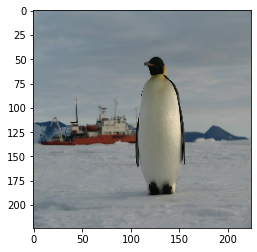

40960/35363 [==================================] - 0s 1us/step
Classifier believes image to be king_penguin with certainty 0.96


In [4]:
# url kann durch beliebige url angepasst werden. Das Modell wurde auf quadratische Bilder trainiert.
# Quadratische Bilder werden in der Regel besser erkannt.
# Das Open Images Dataset von Google ist eine gute Quelle für Bilder, die nach label durchsucht werden können (https://storage.googleapis.com/openimages/web/index.html)
# Wir verwenden ein Bild von  lin padgham (https://www.flickr.com/people/linpadgham/), das wir über das Open Images Dataset gefunden haben.
fname, url = 'download.jpg', 'https://c4.staticflickr.com/4/3130/2589169743_1f93f21747_z.jpg'
image = download_image(fname, url)
show_image(image)
print_prediction(image)

In [5]:
def get_gradient(image, label):
  with tf.GradientTape() as t:
    t.watch(image)
    prediction = tf.dtypes.cast(pretrained_model(image)[0], tf.float64)
    loss = tf.keras.losses.categorical_crossentropy(label, prediction)
  return t.gradient(loss, image)

def category_to_label(imagenet_category):
  label = np.zeros(1000)
  label[imagenet_category] = 1
  return label

In [6]:
# Das label wird benötigt um den Gradienten der Kostenfunktion mit der Methode get_gradient zu bestimmen.
# Sollten Sie ein anderes Bild verwenden, dann sollten Sie auch das label anpassen. Das passende label entnehmen
# Sie dann bitte hier: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
label = category_to_label(145) # 145 entspricht dem label 'king penguin'

In [22]:
# TODO: Ergänzen Sie in der folgenden Zeile den Code zur Berechnung des Adversarial Images nach der Fast Gradient Sign Method (Tipp: tf.sign() verwenden)
adv_image = image + 0.006 * tf.sign(get_gradient(image, label))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


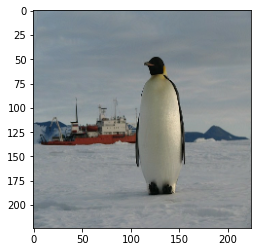

Classifier believes image to be yawl with certainty 0.10


In [20]:
# Visualisierung und Klassifizierung des Adversarial Images
show_image(adv_image)
print_prediction(adv_image)

### c)
> Welche Bedeutung hat der Parameter $\epsilon$? Was fällt Ihnen auf, wenn Sie einen hohen Wert für $\epsilon$ (z.B. 1) wählen, im Vergleich zu einem kleinen Wert (z.B. 0.000001). Verändert sich die Klassifikation?

Umso höher $\epsilon$, umso größer ist die Pertubation. Bei kleinen $\epsilon$ wird die Ausgabe nur unsicherer, bei größeren $\epsilon$ wird die Klassikation falsch, bei sehr großen $\epsilon$ ($\epsilon=1$), ist die Pertubation auch sichtbar.

### d)
> Verwenden Sie nun Ihre Implementierung der **Fast Gradient Sign** Methode um ein möglichst kleines $\epsilon$ (mit Genauigkeit von drei Nachkommastellen) zu finden, für das eine Missklassifikation erfolgt.         
>(Tipp: Sie können eine manuelle binäre Suche durchführen, um relativ schnell ein $\epsilon$  finden)

Ab $\epsilon=0.006$ wird der Pinguin als "Yawl" klassifiziert, bei $\epsilon=0.005$ wird er noch korrekterweise als Pinguin klassifiziert.

## Aufgabe 4 - Vergleich des Carlini-Wagner Angriffs mit der Fast Gradient Sign Methode
> Vergleichen Sie, den in der Vorlesung vorgestellten Carlini-Wagner Angriff mit der Fast Gradient Sign Methode. Welche Vor- bzw. Nachteile bietet der Carlini-Wagner Angriff gegenüber der Fast Gradient Sign Methode.

Die Carlini-Wagner Methode ermöglicht es gezielte Angriffe durchzuführen, d.h. der Angreifer kann gezielt bestimmen welche Klasse er erreichen möchte, mit der Fast Gradient Sign Method wird nur eine Missklassikation erzielt, die Klasse kann aber nicht gewählt werden. Die Fast Gradient Sign Methode ist dafür geschlossen lösbar, im Gegensatz zur Carlini-Wagner Methode die eine Lösung durch iterative numerische Optimierung findet.

# Fazit
In dieser Übung wurden vor allem die theoretischen Konzepte aus der Vorlesung wieder aufgegriffen und dann um 
eine kleine Demonstration der Fast-Gradient-Sign Method ergänzt.

Diese Übung bestand primär aus dem Auflisten von Punkten aus der Vorlesung und haben wenig zur Vertiefung der Themen beigetragen. Positiv hat mir die kleine Demonstration/Implementierung der Fast-Gradient-Sign Method gefallen.